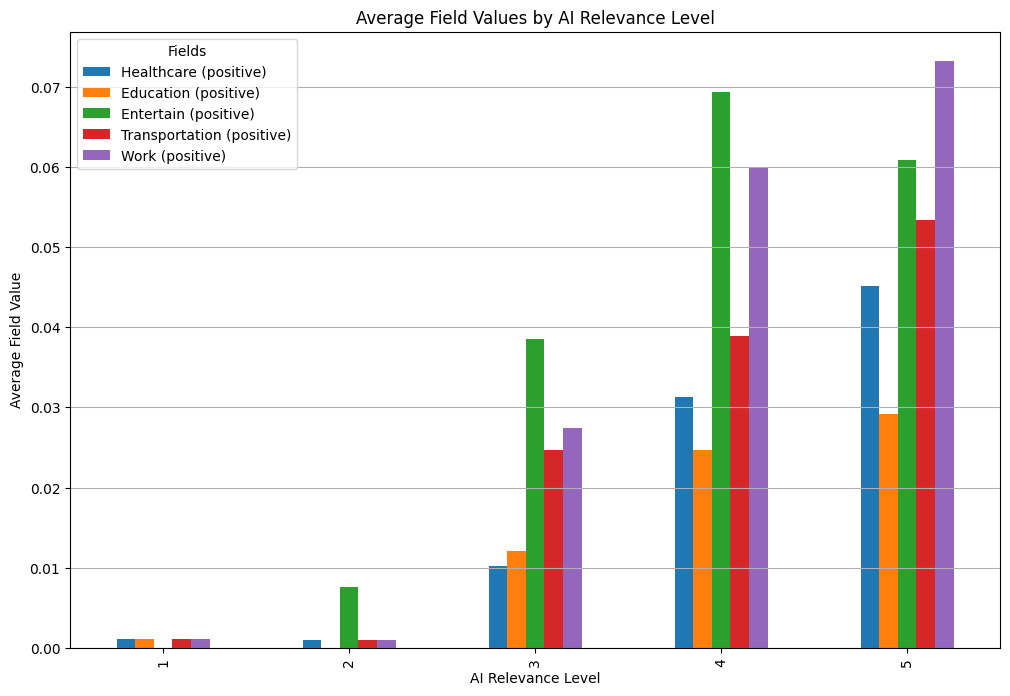

Aggregated Field Values by AI Relevance Level:
              Healthcare (positive)  Education (positive)  \
AI Relevance                                                
1                          0.001048              0.001048   
2                          0.001016              0.000000   
3                          0.010244              0.012052   
4                          0.031354              0.024721   
5                          0.045110              0.029142   

              Entertain (positive)  Transportation (positive)  Work (positive)  
AI Relevance                                                                    
1                         0.000000                   0.001048         0.001048  
2                         0.007622                   0.001016         0.001016  
3                         0.038566                   0.024706         0.027418  
4                         0.069340                   0.038891         0.059994  
5                         0.060812     

In [39]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('robot-ai-all-public.csv')  # Replace with the actual file path

# Select relevant columns for aggregation
fields_of_interest = [
    "AI Relevance", "Healthcare (positive)", "Education (positive)", 
    "Entertain (positive)", "Transportation (positive)", "Work (positive)"
]

# Ensure columns are numeric
df[fields_of_interest] = df[fields_of_interest].apply(pd.to_numeric, errors='coerce').fillna(0)

# Aggregate data: Calculate the mean of each field grouped by AI Relevance level
df_aggregated = df.groupby('AI Relevance')[fields_of_interest[1:]].mean()

# Create a bar plot for aggregated values
df_aggregated.plot(kind='bar', figsize=(12, 8))
plt.title('Average Field Values by AI Relevance Level')
plt.xlabel('AI Relevance Level')
plt.ylabel('Average Field Value')
plt.legend(title='Fields')
plt.grid(axis='y')
plt.show()

# Save the aggregated data to a CSV file
df_aggregated.to_csv('aggregated_ai_relevance.csv')

# Print the aggregated data
print("Aggregated Field Values by AI Relevance Level:")
print(df_aggregated)


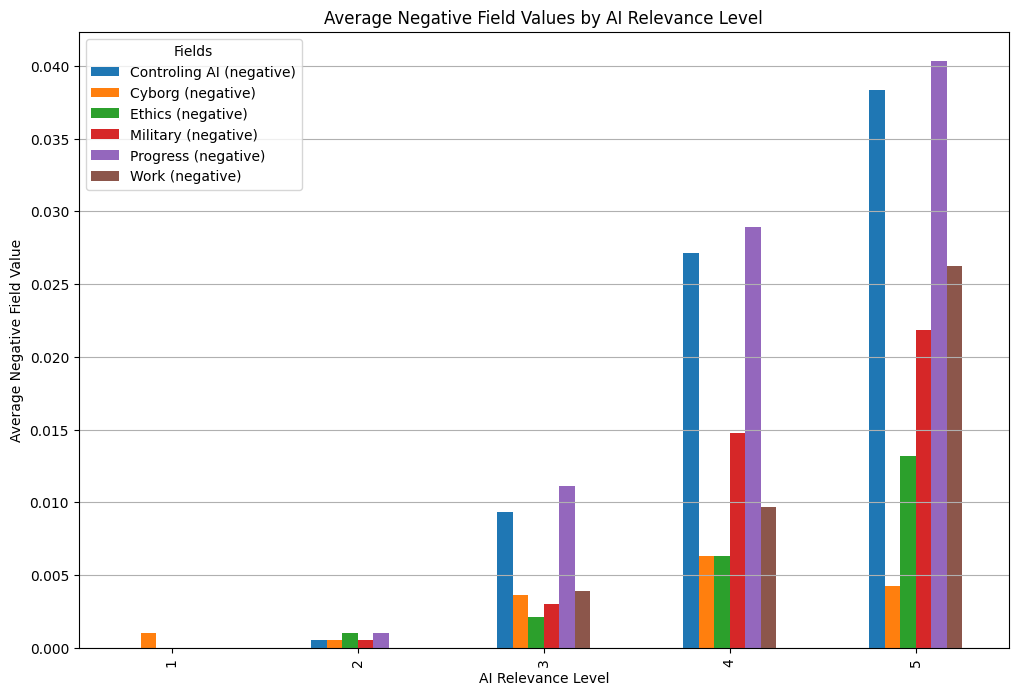

Aggregated Negative Field Values by AI Relevance Level:
              Controling AI (negative)  Cyborg (negative)  Ethics (negative)  \
AI Relevance                                                                   
1                             0.000000           0.001048           0.000000   
2                             0.000508           0.000508           0.001016   
3                             0.009340           0.003616           0.002109   
4                             0.027133           0.006331           0.006331   
5                             0.038323           0.004258           0.013174   

              Military (negative)  Progress (negative)  Work (negative)  
AI Relevance                                                             
1                        0.000000             0.000000         0.000000  
2                        0.000508             0.001016         0.000000  
3                        0.003013             0.011148         0.003917  
4            

In [41]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('robot-ai-all-public.csv')  # Replace with the actual file path

# Select relevant columns for aggregation
fields_of_interest = [
    "AI Relevance", "Controling AI (negative)", "Cyborg (negative)", 
    "Ethics (negative)", "Military (negative)", "Progress (negative)", 
    "Work (negative)"
]

# Aggregate data: Calculate the mean of each field grouped by AI Relevance level
df_aggregated = df.groupby('AI Relevance')[fields_of_interest[1:]].mean()

# Create a bar plot for aggregated values
df_aggregated.plot(kind='bar', figsize=(12, 8))
plt.title('Average Negative Field Values by AI Relevance Level')
plt.xlabel('AI Relevance Level')
plt.ylabel('Average Negative Field Value')
plt.legend(title='Fields')
plt.grid(axis='y')
plt.show()

# Save the aggregated data to a CSV file
df_aggregated.to_csv('aggregated_ai_negative_relevance.csv')

# Print the aggregated data
print("Aggregated Negative Field Values by AI Relevance Level:")
print(df_aggregated)

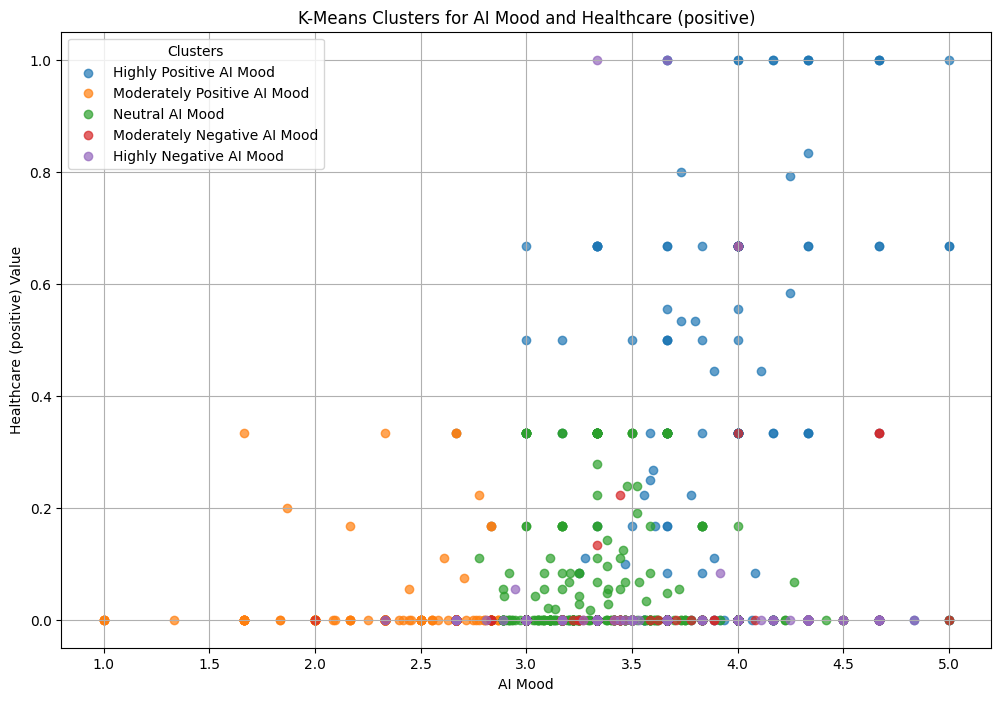

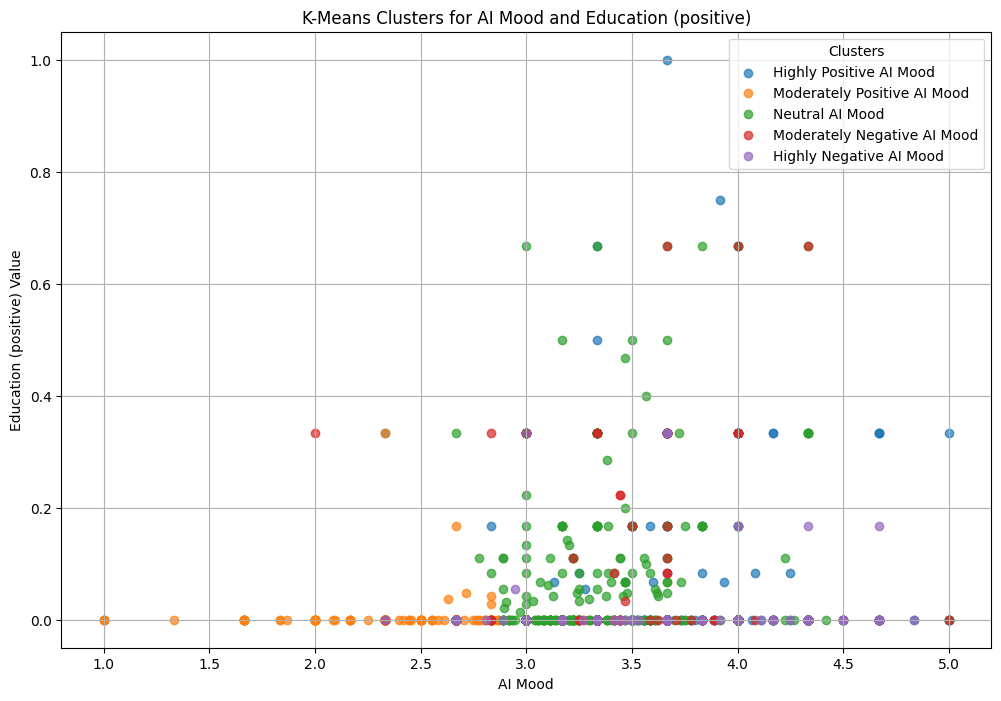

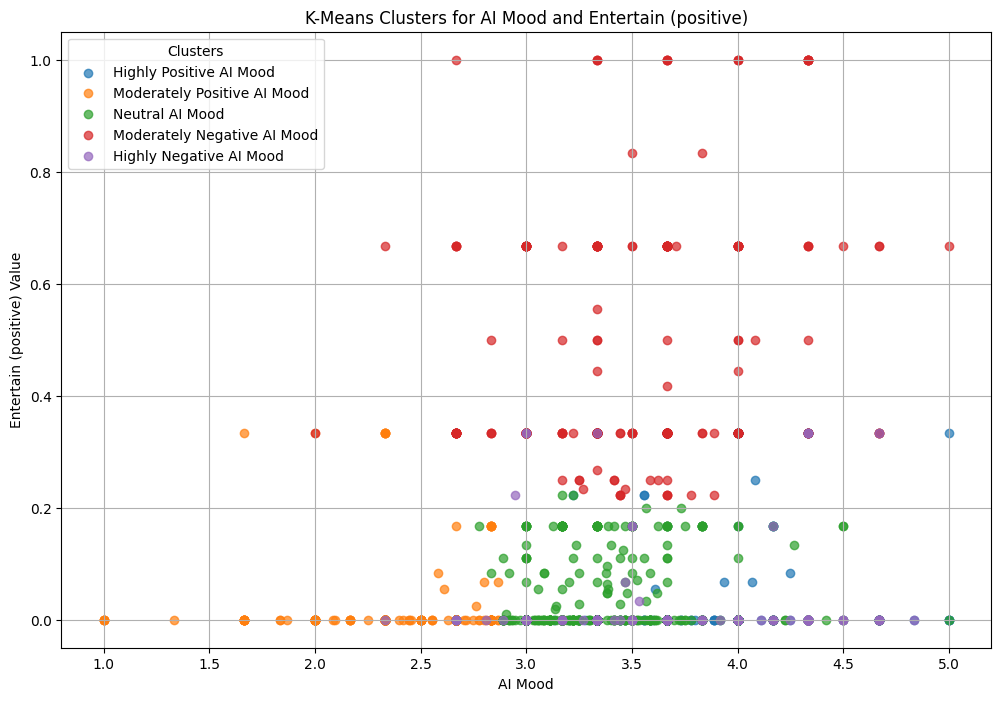

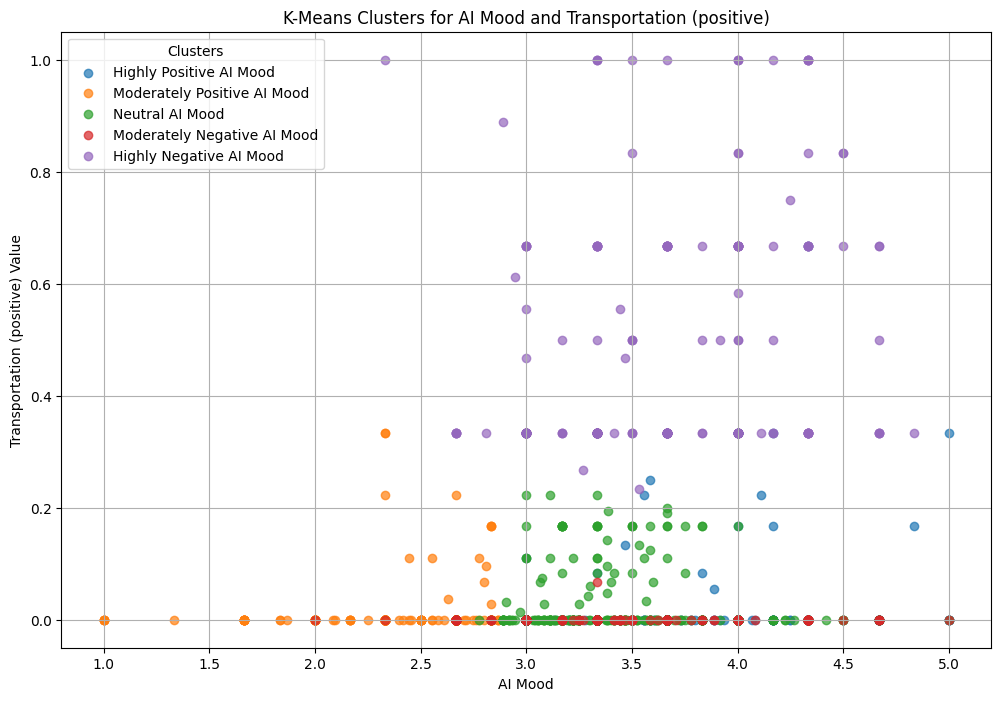

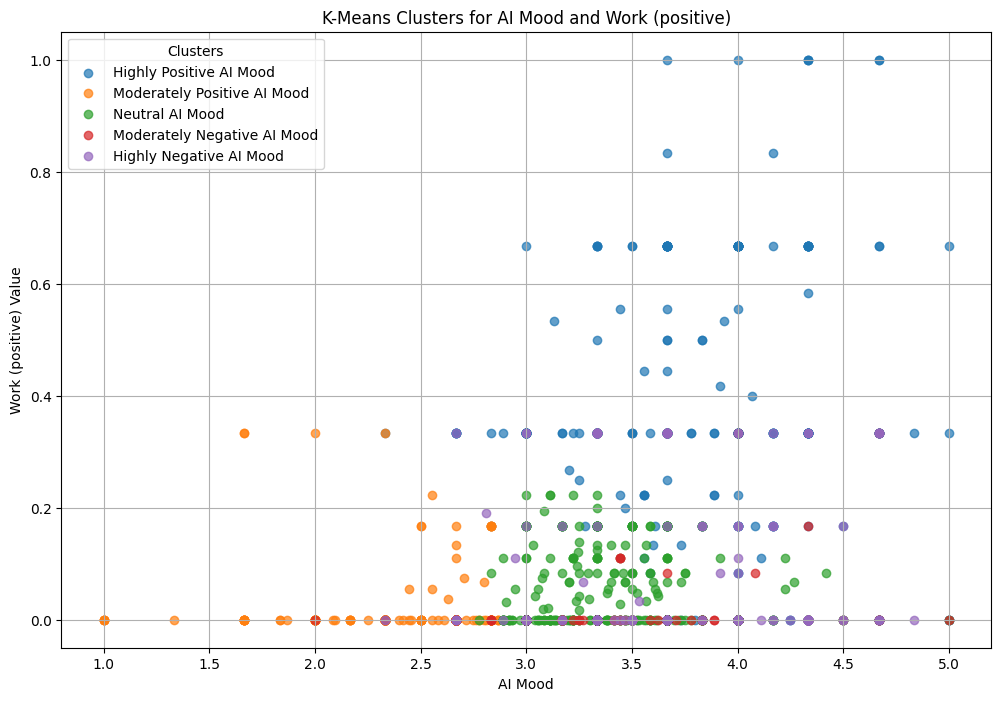

Sample rows from the aggregated and clustered dataset:
                 Article ID   AI Mood  Healthcare (positive)  \
0  4fd100e58eb7c8105d5bbb33  3.000000                    0.0   
1  4fd100e88eb7c8105d5bbd2d  2.333333                    0.0   
2  4fd14a668eb7c8105d627c40  4.000000                    0.0   
3  4fd14a678eb7c8105d627d24  3.000000                    0.0   
4  4fd14a678eb7c8105d627d35  3.000000                    0.0   

   Education (positive)  Entertain (positive)  Transportation (positive)  \
0                   0.0                   0.0                   0.000000   
1                   0.0                   0.0                   0.000000   
2                   0.0                   0.0                   0.000000   
3                   0.0                   0.0                   0.000000   
4                   0.0                   0.0                   0.333333   

   Work (positive)  Cluster                Cluster Label  
0         0.000000        2              Neu

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('robot-ai-all-public.csv')  # Replace with the actual file path

# Combine articles by aggregating rows with the same "Article ID"
fields_to_aggregate = [
    "AI Mood", "Healthcare (positive)", "Education (positive)", 
    "Entertain (positive)", "Transportation (positive)", "Work (positive)"
]
df_aggregated = df.groupby("Article ID")[fields_to_aggregate].mean().reset_index()

# Preprocess numeric data
df_numeric = df_aggregated[fields_to_aggregate].apply(pd.to_numeric, errors='coerce').fillna(0)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_numeric)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust the number of clusters as needed
df_aggregated['Cluster'] = kmeans.fit_predict(normalized_data)

# Label clusters based on characteristics
cluster_labels = {
    0: 'Highly Positive AI Mood',
    1: 'Moderately Positive AI Mood',
    2: 'Neutral AI Mood',
    3: 'Moderately Negative AI Mood',
    4: 'Highly Negative AI Mood'
}
df_aggregated['Cluster Label'] = df_aggregated['Cluster'].map(cluster_labels)

# Create scatter plots comparing AI Mood to each topic
topics = ["Healthcare (positive)", "Education (positive)", "Entertain (positive)", "Transportation (positive)", "Work (positive)"]

for topic in topics:
    plt.figure(figsize=(12, 8))
    for cluster_id in range(kmeans.n_clusters):
        cluster_data = df_aggregated[df_aggregated['Cluster'] == cluster_id]
        plt.scatter(
            cluster_data['AI Mood'],
            cluster_data[topic],
            label=f'{cluster_labels[cluster_id]}',
            alpha=0.7
        )

    plt.title(f'K-Means Clusters for AI Mood and {topic}')
    plt.xlabel('AI Mood')
    plt.ylabel(f'{topic} Value')
    plt.legend(title='Clusters')
    plt.grid(True)
    plt.show()

# Save clustered data to CSV file
df_aggregated.to_csv('aggregated_clustered_ai_mood.csv', index=False)

# Print sample rows from the aggregated and clustered dataset
print("Sample rows from the aggregated and clustered dataset:")
print(df_aggregated.head())
